In [1]:
# import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
from PIL import Image
import os
import math

In [2]:
correct_1 = pd.read_csv('correct_mid_to_down.csv')
correct_2 = pd.read_csv('correct_up_to_mid.csv')
incorrect = pd.read_csv('incorrect.csv')
random = pd.read_csv('random.csv')

In [5]:
train_df = pd.concat([correct_1, correct_2, incorrect, random], ignore_index=True)
train_df = train_df.sample(frac=1).reset_index(drop=True)
# train_df.to_csv('lat_pull_down_train_df.csv')

In [6]:
x_cols = [col for col in train_df.columns.to_list() if col != "label"]
print(x_cols)
x_df = train_df[x_cols]
y_df = train_df[['label']]

['left_elbow_angle', 'right_elbow_angle', 'left_shoulder_angle', 'right_shoulder_angle', 'left_hip_angle', 'right_hip_angle', 'torso_straightness', 'arms_straightness']


In [7]:
y_df['label'] = y_df['label'].astype('int')

C:\Users\2001l\AppData\Local\Temp\ipykernel_38128\1068778217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_df['label'] = y_df['label'].astype('int')


In [11]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Assuming y_df has the integer labels (0, 1, 2, 3)
y_df_one_hot = to_categorical(y_df, num_classes=4)

# Define a Sequential model for multi-class classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),  # Adjust input_shape to match your input features
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # Output layer for 3 classes
])

opti = Adam(learning_rate=0.00003)

# Compile the model with categorical_crossentropy for multi-class classification
model.compile(optimizer=opti,
              loss='categorical_crossentropy',  # Suitable for multi-class classification
              metrics=['accuracy'])

# Train the model with one-hot encoded labels
history = model.fit(x_df, y_df_one_hot, epochs=150, validation_split=0.2)  # Adjust epochs as needed

# Save the model in a format suitable for TensorFlow Lite
model.save('model_bicep.h5')


Epoch 1/150


c:\Users\2001l\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3164 - loss: 15.4793 - val_accuracy: 0.3590 - val_loss: 5.1945
Epoch 2/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4306 - loss: 3.2768 - val_accuracy: 0.5769 - val_loss: 1.6676
Epoch 3/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6036 - loss: 1.6818 - val_accuracy: 0.6487 - val_loss: 1.2264
Epoch 4/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.6634 - loss: 1.3239 - val_accuracy: 0.7128 - val_loss: 1.0174
Epoch 5/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7070 - loss: 1.0721 - val_accuracy: 0.7503 - val_loss: 0.8909
Epoch 6/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7323 - loss: 0.9487 - val_accuracy: 0.7703 - val_loss: 0.7985
Epoch 7/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7568 - loss: 0.8468 - val_accuracy: 0.7754 - val_loss: 0.7269
Epoch 8/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7658 - loss: 0.7862 - val_accuracy: 0.8

In [8]:
from tensorflow.keras.models import load_model
model = load_model('model_bicep.h5')

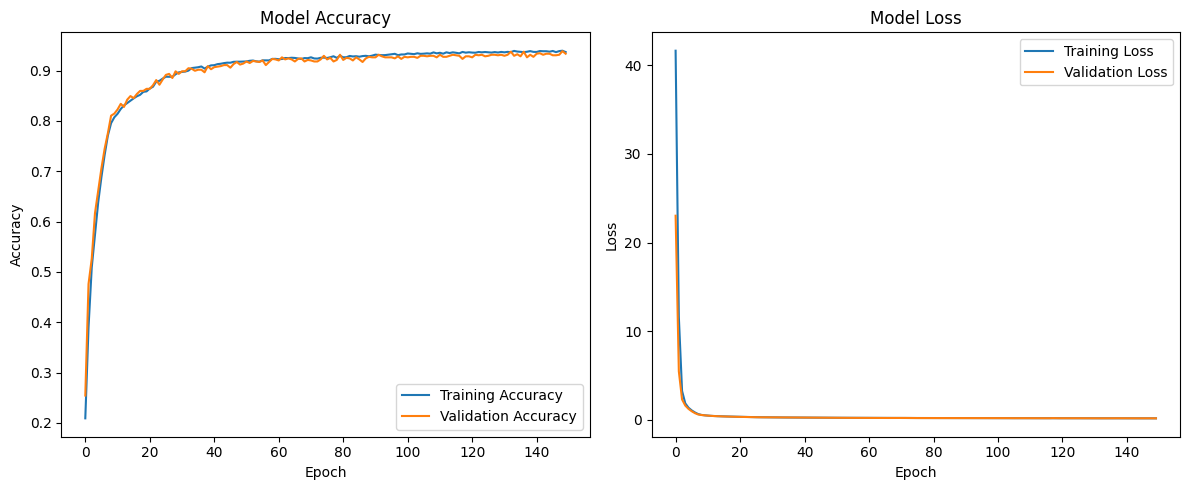

In [11]:

import matplotlib.pyplot as plt

# Save the model in a format suitable for TensorFlow Lite
model.save('model_lat_pull_down.h5')

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/150


c:\Users\2001l\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1918 - loss: 52.3037 - val_accuracy: 0.2544 - val_loss: 23.0331
Epoch 2/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.3229 - loss: 16.3102 - val_accuracy: 0.4759 - val_loss: 5.4783
Epoch 3/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.4981 - loss: 4.0933 - val_accuracy: 0.5262 - val_loss: 2.3071
Epoch 4/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.5587 - loss: 2.0682 - val_accuracy: 0.6164 - val_loss: 1.6132
Epoch 5/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.6198 - loss: 1.4707 - val_accuracy: 0.6605 - val_loss: 1.2386
Epoch 6/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.6760 - loss: 1.1180 - val_accuracy: 0.7056 - val_loss: 0.9714
Epoch 7/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.7208 - loss: 0.8724 - val_accuracy: 0.7446 - val_loss: 0.7564
Epoch 8/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.7679 - loss: 0.6777 - val

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


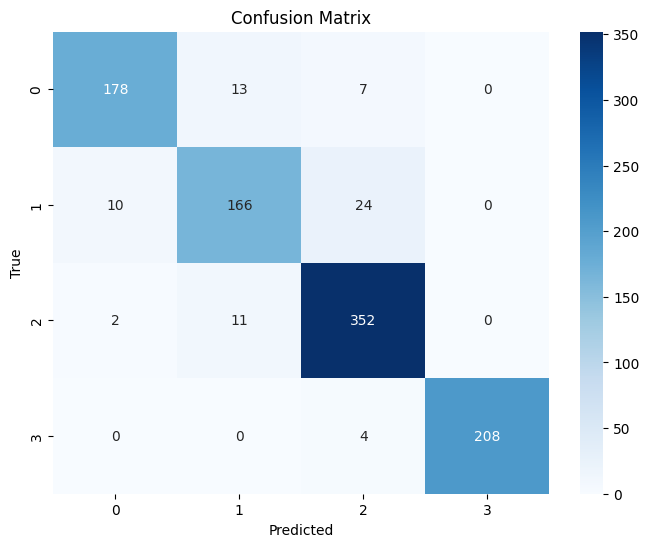

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x_df and y_df are your features and labels respectively

# One-hot encode the labels
y_df_one_hot = to_categorical(y_df, num_classes=4)

# Split the data into 80% training, 10% validation, and 10% test
x_train, x_temp, y_train, y_temp = train_test_split(x_df, y_df_one_hot, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Define a Sequential model for multi-class classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),  # Adjust input_shape to match your input features
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # Output layer for 4 classes
])

opti = Adam(learning_rate=0.00003)

# Compile the model with categorical_crossentropy for multi-class classification
model.compile(optimizer=opti,
              loss='categorical_crossentropy',  # Suitable for multi-class classification
              metrics=['accuracy'])

# Train the model with one-hot encoded labels
history = model.fit(x_train, y_train, epochs=150, validation_data=(x_val, y_val))  # Adjust epochs as needed

# Save the model in a format suitable for TensorFlow Lite
model.save('model_bicep.h5')

# Evaluate the model on the test set
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(4), yticklabels=np.arange(4))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [12]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import KBinsDiscretizer

# Assuming train_df is your DataFrame and 'label' is the categorical target feature

# 1. Bin the continuous features in train_df
continuous_features = x_cols  # List your continuous features

# Apply KBinsDiscretizer to bin continuous features into 3 bins (you can adjust the number of bins as needed)
binning = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')  # 'uniform' gives equally spaced bins
train_df[continuous_features] = binning.fit_transform(train_df[continuous_features])

# 2. Perform a Chi-Square test between each feature and the categorical 'label' feature
chi_square_results = []

for feature in continuous_features:
    # Create a contingency table for the feature vs the 'label'
    contingency_table = pd.crosstab(train_df[feature], train_df['label'])
    
    # Perform the Chi-Square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Store the result
    chi_square_results.append((feature, chi2_stat, p_value))

# Display the results
chi_square_df = pd.DataFrame(chi_square_results, columns=['Feature', 'Chi2 Stat', 'P-Value'])
print(chi_square_df)

# If you'd like to only show features that have a statistically significant relationship (e.g., p-value < 0.05)
significant_results = chi_square_df[chi_square_df['P-Value'] < 0.05]
print("\nSignificant Results (p-value < 0.05):")
print(significant_results)

                Feature     Chi2 Stat        P-Value
0      left_elbow_angle   5023.709334   0.000000e+00
1     right_elbow_angle   5501.242663   0.000000e+00
2   left_shoulder_angle   9154.604331   0.000000e+00
3  right_shoulder_angle   9004.340381   0.000000e+00
4        left_hip_angle  15947.383878   0.000000e+00
5       right_hip_angle  18855.912088   0.000000e+00
6    torso_straightness   5831.913657   0.000000e+00
7     arms_straightness    578.230970  9.730224e-105

Significant Results (p-value < 0.05):
                Feature     Chi2 Stat        P-Value
0      left_elbow_angle   5023.709334   0.000000e+00
1     right_elbow_angle   5501.242663   0.000000e+00
2   left_shoulder_angle   9154.604331   0.000000e+00
3  right_shoulder_angle   9004.340381   0.000000e+00
4        left_hip_angle  15947.383878   0.000000e+00
5       right_hip_angle  18855.912088   0.000000e+00
6    torso_straightness   5831.913657   0.000000e+00
7     arms_straightness    578.230970  9.730224e-105


c:\Users\2001l\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
